In [347]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from shutil import copy

In [125]:
init_df1 = pd.read_csv(r'D:\NGSIM\us-101\us-101-vehicle-trajectory-data\vehicle-trajectory-data\0750am-0805am\trajectories-0750am-0805am.csv')
init_df1.head(50)

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
1,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
2,2,15,437,1118846980400,16.426,43.381,6451143.018,1873339.038,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
3,2,16,437,1118846980500,16.405,47.380,6451145.706,1873336.077,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
4,2,17,437,1118846980600,16.385,51.381,6451148.395,1873333.115,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
5,2,18,437,1118846980700,16.364,55.381,6451151.084,1873330.153,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
6,2,19,437,1118846980800,16.344,59.381,6451153.772,1873327.192,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
7,2,20,437,1118846980900,16.323,63.379,6451156.461,1873324.230,14.5,4.9,2,40.02,0.25,2,0,0,0.0,0.0
8,2,21,437,1118846981000,16.303,67.383,6451159.149,1873321.268,14.5,4.9,2,40.03,0.13,2,0,0,0.0,0.0
9,2,22,437,1118846981100,16.282,71.398,6451161.838,1873318.307,14.5,4.9,2,39.93,-1.63,2,0,13,0.0,0.0


In [52]:
df_pre2 = init_df1.loc[init_df1['Lane_ID']== 2]
list_2 = df_pre2['Vehicle_ID'].drop_duplicates().to_list()
df_pre1 = init_df1.loc[init_df1['Lane_ID']== 1]
list_1 = df_pre1['Vehicle_ID'].drop_duplicates().to_list()
df_pre3 = init_df1.loc[init_df1['Lane_ID']== 3]
list_3 = df_pre3['Vehicle_ID'].drop_duplicates().to_list()
df_pre4 = init_df1.loc[init_df1['Lane_ID']== 4]
list_4 = df_pre4['Vehicle_ID'].drop_duplicates().to_list()
df_pre5 = init_df1.loc[init_df1['Lane_ID']== 5]
list_5 = df_pre5['Vehicle_ID'].drop_duplicates().to_list()

In [3]:
#定义取合集的函数
def extra_same_elem2(list1, list2,list3):
    set1 = set(list1)
    set2 = set(list2)
    set3 = set(list3)
    iset = set1.intersection(set2)
    iset = iset.intersection(set3)
    return list(iset)

def extra_same_elem(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    iset = set1.intersection(set2)
    return list(iset)

In [5]:
#原数据分组
def get_group_data(list_k,list_m,list_n,list_x,list_y,k,m,n,x,y,z,q,base_dir,init_df):#k = 12,m = 23 , n = 123,x = 234,y = 34,z = 345,q = 45
    
    name_list = [k,m,n,x,y,z,q]
    
    list_out = extra_same_elem(list_k,list_m)#1 and 2
    list_out1 = extra_same_elem(list_m,list_n)# 2 and 3
    list_out2 = extra_same_elem2(list_k, list_m,list_n)# 1 and 2 and 3
    list_out3 = extra_same_elem2(list_m, list_n,list_x)# 2 and 3 and 4
    list_out4 = extra_same_elem(list_n,list_x)#3 and 4
    list_out5 = extra_same_elem2(list_n, list_x,list_y)# 3 and 4 and 5
    list_out6 = extra_same_elem(list_x,list_y)#4 and 5
    
#     for item in name_list:
#         os.mkdir(base_dir + '{name}'.format(name = item))
 
    
    for item in list_out:
        if item in list_out2:
            list_out.remove(item)
            
    for item in list_out1:
        if item in list_out2:
            list_out1.remove(item)
        if item in list_out3:
            if item in list_out1:
                list_out1.remove(item)
            
    for item in list_out4:
        if item in list_out3:
            list_out4.remove(item)
        if item in list_out5:
            if item in list_out4:
                list_out4.remove(item)
    
    for item in list_out6:
        if item in list_out5:
            list_out6.remove(item)

    for item in list_out:
        dfi = init_df.loc[init_df['Vehicle_ID']== item]
        dfi.to_excel(base_dir + "{namepre}\\df_{name}.xlsx".format(namepre = k,name = item))
    for item in list_out1:
        dfi = init_df.loc[init_df['Vehicle_ID']== item]
        dfi.to_excel(base_dir + "{namepre}\\df_{name}.xlsx".format(namepre = m,name = item))
    for item in list_out2:
        dfi = init_df.loc[init_df['Vehicle_ID']== item]
        dfi.to_excel(base_dir + "{namepre}\\df_{name}.xlsx".format(namepre = n,name = item))
    for item in list_out3:
        dfi = init_df.loc[init_df['Vehicle_ID']== item]
        dfi.to_excel(base_dir + "{namepre}\\df_{name}.xlsx".format(namepre = x,name = item))
    for item in list_out4:
        dfi = init_df.loc[init_df['Vehicle_ID']== item]
        dfi.to_excel(base_dir + "{namepre}\\df_{name}.xlsx".format(namepre = y,name = item))
    for item in list_out5:
        dfi = init_df.loc[init_df['Vehicle_ID']== item]
        dfi.to_excel(base_dir + "{namepre}\\df_{name}.xlsx".format(namepre = z,name = item))
    for item in list_out6:
        dfi = init_df.loc[init_df['Vehicle_ID']== item]
        dfi.to_excel(base_dir + "{namepre}\\df_{name}.xlsx".format(namepre = q,name = item))

In [79]:
#get_group_data(list_1,list_2,list_3,list_4,list_5,"12","23","123","234","34","345","45")

In [6]:
#719,104,删除文件
def remove_unusable_data(df_dir,num1,num2):
    df_num = pd.read_excel(df_dir)
    df_num_num2 = list(df_num['Lane_ID']).count(num2)
    df_num_num1 = list(df_num['Lane_ID']).count(num1)
    if df_num_num1 < 10 or df_num_num2 <10:
        os.remove(df_dir)       

In [350]:
#获取文件路径名称列表
def get_files_list(base_dir):
    dir_num_list = os.listdir(base_dir)
    root_dir = base_dir+"\\"
    files_dir_list = []
    for item in range(len(dir_num_list)):
        files_dir_list.append(root_dir + dir_num_list[item])
    return files_dir_list,dir_num_list

In [351]:
#数据清洗
def data_clean(base_dir,num1,num2):
    files_dir_list,dir_num_list = get_files_list(base_dir)
    for item in files_dir_list:
        remove_unusable_data(item,num1,num2)

In [352]:
def shutil_data(df_name,num1,num2,base_dir):
    df_num = pd.read_excel(base_dir + num1 + num2 +  "\\" + df_name)
    first_lane = df_num.head(1)['Lane_ID'].tolist()[0]
    if first_lane == int(num1):
        copy(base_dir + '{name1}\\{name2}'.format(name1 = num1 + num2,name2 = df_name), 
             base_dir + '{name1}\\{name2}'.format(name1 = num1 + ' to ' + num2, name2 = df_name))
    else:
         copy(base_dir + '{name1}\\{name2}'.format(name1 = num1 + num2,name2 = df_name), 
             base_dir + '{name1}\\{name2}'.format(name1 = num2 + ' to ' + num1, name2 = df_name))


In [236]:
#12文件夹数据分类拷贝
#for item in dir_num_list_12:
    #shutil_data(item,'1','2')

In [ ]:
#################################至此开始2到一数据处理###########################

In [10]:
#13m 以上就是2道，13m以下是1道
def plot_trac(df_dir):
    df_num = pd.read_excel(df_dir)
    Local_X_num = df_num['Local_X'].to_list()
    Local_Y_num = df_num['Local_Y'].to_list()
    plt.figure(figsize=(8,3),dpi=100)
    plt.plot(Local_Y_num,Local_X_num,alpha = 0.5)
    plt.xlabel('Local_Y/feet')
    plt.ylabel('Local_X/feet')
    plt.show()

In [353]:
#获取横向速度
def get_lateral_velocity(df_dir):
    
    df_num = pd.read_excel(df_dir)
    Local_dict_num = df_num[['Local_X','Local_Y']].to_dict('records')

    angle_list_num = []
    sin_angle_num = []
    v_list_num = df_num['v_Vel'].to_list()
    v_lateral_list = []

    for item in range(len(Local_dict_num)):
        if item == 0:
            actan = math.atan2(Local_dict_num[item+1]['Local_X'] - Local_dict_num[item]['Local_X'],
                               (Local_dict_num[item+1]['Local_Y'] - Local_dict_num[item]['Local_Y']))
            angle = actan/math.pi*180
            angle_list_num.append(angle)
            sin_angle_num.append(math.sin(actan))
            v_lateral_list.append(v_list_num[item]*sin_angle_num[item])
            
        elif item == (len(Local_dict_num) - 1):
            actan = math.atan2(Local_dict_num[item]['Local_X'] - Local_dict_num[item-1]['Local_X'],
                               (Local_dict_num[item]['Local_Y'] - Local_dict_num[item-1]['Local_Y']))
            angle = actan/math.pi*180
            angle_list_num.append(angle)
            sin_angle_num.append(math.sin(actan))
            v_lateral_list.append(v_list_num[item]*sin_angle_num[item])
            
        else:
            actan = math.atan2(Local_dict_num[item]['Local_X'] - Local_dict_num[item-1]['Local_X'],
                               (Local_dict_num[item]['Local_Y'] - Local_dict_num[item-1]['Local_Y']))
            angle = actan/math.pi*180
            angle_list_num.append(angle)
            sin_angle_num.append(math.sin(actan))
            v_lateral_list.append(v_list_num[item]*sin_angle_num[item])
 
    return v_lateral_list

In [24]:
#给从2道换到1道用,获取片段的v_lateral
def get_cut_data21(df_dir,dir_name):
    df_num = pd.read_excel(df_dir)
    df1 = df_num.where(df_num['Local_X']>13).dropna(axis=0, how='any')
    
    last_index = df1.tail(1).index.tolist()[0]
    threshold = df1.iloc[last_index]['Local_Y'] - 205
    df_use1 = df1.where(df1['Local_Y'] > threshold)
    df_final = df_use1.dropna(axis=0, how='any')
    first_index = df_final.head(1).index.tolist()[0]

    df_final.to_excel(r'D:\NGSIM\preprocessed data\cut_21\{name}'.format(name = dir_name))
    df_final_dir = r'D:\NGSIM\preprocessed data\cut_21\{name}'.format(name = dir_name)
    
    
    return get_lateral_velocity(df_final_dir)

In [187]:
#获取速度字典
def get_velocity_dict_21(base_dir):
    files_dir_list_num,dir_num_list_num = get_files_list(base_dir)
    v_lateral_dict = {}
    for item in range(len(files_dir_list_num)):
        v_lateral_dict[dir_num_list_num[item]] = get_cut_data21(files_dir_list_num[item],dir_num_list_num[item])
    return v_lateral_dict

In [15]:
#数据清洗copy截片
#v_lateral_dict_21 = get_velocity_dict('D:\\NGSIM\\preprocessed data\\2 to 1')

In [194]:
#获得变道点的字典，适用2道换1道
def get_change_point_21(v_lateral_dict_num):
    change_point_dict = {}
    for key, value in v_lateral_dict_num.items():
        v_first_list = []
        for item in range(len(value)):
            if  value[item] < -1.0:
                v_first_list.append(item)
        change_point = v_first_list[0]
        change_point_dict[key] = change_point
    return change_point_dict

In [102]:
#change_point_dict_21 = get_change_point(v_lateral_dict_21)

In [2]:
#-1.0是一个可行的point，是这个点的前面一个点作为decision点
#1854,376,1109,1267,1460,1562,1612,2111,2235,2376,2610,2745,749数据需要手工处理
# change_point_dict_21['df_376.xlsx'] = 40
# change_point_dict_21['df_1854.xlsx'] = 15
# change_point_dict_21['df_1109.xlsx'] = 66
# change_point_dict_21['df_1267.xlsx'] = 37
# change_point_dict_21['df_1460.xlsx'] = 27
# change_point_dict_21['df_1562.xlsx'] = 28
# change_point_dict_21['df_1612.xlsx'] = 15
# change_point_dict_21['df_2111.xlsx'] = 51
# change_point_dict_21['df_2235.xlsx'] = 31
# change_point_dict_21['df_2376.xlsx'] = 36
# change_point_dict_21['df_2610.xlsx'] = 65
# change_point_dict_21['df_2745.xlsx'] = 39
# change_point_dict_21['df_749.xlsx'] = 31

In [54]:
#change_files_list_21 = list(change_point_dict_21.keys())

In [216]:
def get_final_change_point_21(dir_name):
    base_dir = 'D:\\NGSIM\\preprocessed data\\cut_21\\'
    df_cut_num = pd.read_excel(base_dir + dir_name,index_col = 'Unnamed: 0.1')
    first_index = df_cut_num.head(1).index.tolist()[0]
    change_point = first_index + change_point_dict_21[dir_name]
    change_point_dict_21[dir_name] = change_point

In [104]:
#for item in change_files_list_21:
    #get_final_change_point(item)

In [106]:
#得到换道点并存储excel
#df_change_point_21 = pd.DataFrame([change_point_dict_21])
#df_change_point_21.to_excel(r'D:\NGSIM\preprocessed data\change_point\df_change_point_21.xlsx')

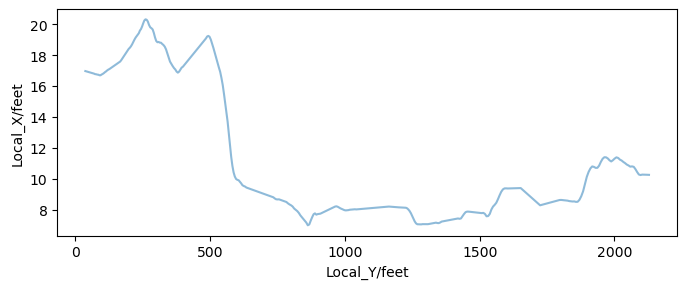

In [226]:
plot_trac(r'D:\NGSIM\preprocessed data\12\df_749.xlsx')

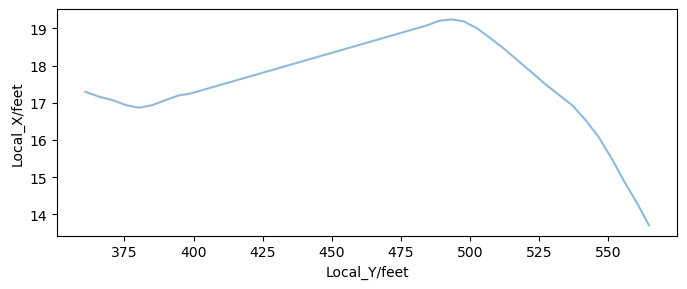

In [17]:
plot_trac(r'D:\NGSIM\preprocessed data\cut_21\df_749.xlsx')